In [1]:
import math
import random
import time
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters, Parameter, report_fit
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt
from IPython.display import clear_output

#### Data and Functions

In [2]:
DF = (pd.read_csv('data.csv').iloc[:,1:]).interpolate()

In [3]:
def PLGMplot(t,epip,epit,hypt,hypp):    
    fig, axs = plt.subplots(2, 1,figsize=(28,20))
    axs[0].plot(t,epit, label = 'True')
    axs[0].plot(t,epip, label = 'Obs')
    axs[0].legend()
    # axs[0].set_ylabel('Phosphorus [ug/L]')
    axs[0].set_ylabel('Phosphorus [g]')
    axs[0].set_xlabel('Year')
    axs[1].plot(t,hypt, label = 'True')
    axs[1].plot(t,hypp, label = 'Obs')
    axs[1].legend()
    return plt.show()

#### PLGM optimization

In [6]:
def own_loss(y_e, y_e_pred,y_h,y_h_pred,l1e,l2e,l1h,l2h):
    def sub_loss(y_true,y_pred,l1x,l2x):
        # l1x = l1e    l2x = l2e
        rmse = ((y_true - y_pred) ** 2)
        r21 = ((y_true - np.mean(y_true)) ** 2)
        r22 = ((y_true - y_pred) ** 2)
        l  = np.array(rmse*l1x + (r21/r22)*l2x)[1:]
        return l
    le = sub_loss(y_e,y_e_pred,l1e,l2e)
    lh = sub_loss(y_h,y_h_pred,l1h,l2h)
    loss = le + lh
    return loss.ravel()
def own_opt_metric(params,DF):
    print('optimizing')
    le_opt  = params['le_opt']
    alpha  = params['alpha']
    beta  = params['beta']
    lh = 1 - le_opt
    l1e = le_opt*alpha
    l2e = le_opt - l1e    
    l1h = lh*beta
    l2h = lh - l1h
    
    Output = 1; O = 0
    Pepi, Phyp = PLGM_OPT(params,DF)
    
    y_et = (DF['EpiP'])[:-2]
    y_e = [(x - np.nanmin(y_et)) / (np.nanmax(y_et) - np.nanmin(y_et)) for x in y_et]

    y_et_pred = Pepi[:-2]
    y_e_pred = [(x - np.nanmin(y_et_pred)) / (np.nanmax(y_et_pred) - np.nanmin(y_et_pred)) for x in y_et_pred]

    y_ht = (DF['HypP'])[:-2]
    y_h = [(x - np.nanmin(y_ht)) / (np.nanmax(y_ht) - np.nanmin(y_ht)) for x in y_ht]    

    y_ht_pred = Phyp[:-2]
    y_h_pred = [(x - np.nanmin(y_ht_pred)) / (np.nanmax(y_ht_pred) - np.nanmin(y_ht_pred)) for x in y_ht_pred]

    print('before filter nan')
    # Performance metric computation 
    y_e, y_e_pred,y_h,y_h_pred  = [list (x) for x in [y_e, y_e_pred,y_h,y_h_pred]]
    y_e, y_e_pred= [a for a, b in zip(y_e, y_e_pred) if not (np.isnan(a) or np.isnan(b))], [b for a, b in zip(y_e, y_e_pred) if not (np.isnan(a) or np.isnan(b))]
    y_h, y_h_pred= [a for a, b in zip(y_h, y_h_pred) if not (np.isnan(a) or np.isnan(b))], [b for a, b in zip(y_h, y_h_pred) if not (np.isnan(a) or np.isnan(b))]            
    
    print('before filter len')
    if len(y_e_pred)  < (y_et.shape[0])*0.85 or len(y_h_pred) < (y_et.shape[0])*0.85:
        loss = [1e10]*13000
    else:
        loss = own_loss(np.array(y_e), np.array(y_e_pred),np.array(y_h),np.array(y_h_pred),l1e,l2e,l1h,l2h)
    
    clear_output(wait =True)
    return(loss)

In [7]:
def PLGM_OPT(params,DF):
    
    #DF = DF.copy()
    if Data == 0:
        ThetaRp = params['ThetaRp'];ThetaSPhyp = params['ThetaSPhyp'];ThetaSPepi  = params['ThetaSPepi']
        KsedP  = params['KsedP']; SedDepth = 0.1
        TbaseSPepi  = params['TbaseSPepi']; TbaseSPhyp  = params['TbaseSPhyp']; TbaseRp = params['TbaseRp']
        RrecP = params['RrecP'];  PSED = params['PSED'];
        CburialP =params['CburialP']
        le_opt = params['le_opt']
        alpha = params['alpha']
        beta = params['beta']

    else:        
        ThetaRp = params0['ThetaRp'];ThetaSPhyp = params0['ThetaSPhyp'];ThetaSPepi  = params0['ThetaSPepi']
        KsedP  = params0['KsedP']; SedDepth = 0.1
        TbaseSPepi  = params0['TbaseSPepi']; TbaseSPhyp  = params0['TbaseSPhyp']; TbaseRp = params0['TbaseRp']
        RrecP = params0['RrecP'];  PSED = params0['PSED'];
        CburialP =params0['CburialP']
        le_opt = params0['le_opt']
        alpha = params0['alpha']
        beta = params0['beta']
    

        
    CoefRp       = np.asarray(ThetaRp**(DF.SedTemp - TbaseRp)) # Arrhenius coefficient for recycling
    CoefSPepi    = np.asarray(ThetaSPepi**(DF.EpiTemp - TbaseSPepi)) # Arrhenius coefficient for sedimentation (assuming phytos are sinking)
    CoefSPhyp    = np.asarray(ThetaSPhyp**(DF.HypTemp - TbaseSPhyp)) # Arrhenius coefficient for sedimentation (assuming phytos are sinking)
   
    Psed[0] = (SedimentArea * SedimentPConc)*PSED
    
    for i in Ndays[1:]:
        
        '''Entrainment'''

        if dEpiV[i] == 0:        
            EntrP[i] = 0 # Phosphorus entrainment
            #EntrN[i] = 0 # Nitrogen entrainmnet 

        elif dEpiV[i] >0:        
            EntrP[i] = (dEpiV[i]/HypV[i-1])*Phyp[i-1] # gP from Hyp
            #EntrN[i] = (dEpiV[i]/HypV[i-1])*Nhyp[i-1] # gN from Hyp
        
        else:
            EntrP[i] = (dEpiV[i]/EpiV[i-1])*Pepi[i-1] # gP from Pepi
            #EntrN[i] = (dEpiV[i]/EpiV[i-1])*Nepi[i-1] # gN from Pepi

        '''Recycling''' 
        Rp[i] = Psed[i-1]*(RrecP)*(KsedP/(DF['SedOx[g/m3]'][i-1]*DF.SedV[i-1] + KsedP))*CoefRp[i-1] #*((Psed[i-1]**q)/((Psed[i-1]**q)+(nP**q)))

        
        '''Vertical Diffusion (Hvd)'''
        Hvd[i] = 0
        if DF.Strat[i-1] == False:
            Csedi = 14.5/(89*10**13*155*365)
            CPsedEpi = Csedi /2
            CPsedHyp = Csedi /2


        else:
            kmz = DF.Kz[i-1]#0.005*1.6*(151**0.568) # Diffusion coeficient
            Hvd[i] = kmz*(Phyp[i-1]-Pepi[i-1])/(DF.HypZm[i-1]-DF.EpiZm[i-1]) # Diffusion
            CPsedEpi = (14.5/(1000*EpiV[i-1]*DF.EpiZm[i-1]*365))
            CPsedHyp = (14.5/(1000*HypV[i-1]*DF.HypZm[i-1]*365)) 

       
        '''Sedimentation'''

        SedPepi[i] = CPsedEpi*Pepi[i-1]*CoefSPepi[i-1]*Sedv#*((Pepi[i-1]**qE)/((Pepi[i-1]**qE)+(nPE**qE)))   # Sed's phosphorus,
        SedPhyp[i] = CPsedHyp*Phyp[i-1]*CoefSPhyp[i-1]*Sedv#*((Phyp[i-1]**qH)/((Phyp[i-1]**qH)+(nPE**qH)))   # Sed's phosphorus,CPsedHyp

        '''Loss'''
        # Nutrients
        Ep[i]    = DF.Qout[i-1]*(Pepi[i-1]/EpiV[i-1])     # River outflow
        
        '''Input'''
        #Phosphorus Load
        IepiP[i] = DF.LoadPe[i-1]#(1-Fp)*DF.LoadTP[i-1]    # To epiliminion
        IsedP[i] = DF.LoadPh[i-1]#Fp*DF.LoadTP[i-1]        # To hyp

        '''Burial'''
        Bp[i] = CburialP*(1/365)*(1/1000)*Psed[i-1]/SedDepth    # Sedimnets burial
        
        ''' Update '''
        if DF.Strat[i-1] == False and DF.Strat[i] == False: # Full mixed
            
            VpEpi      = DF.EpiV[i-1]/(DF.EpiV[i-1]+DF.HypV[i-1])
            
            EntrP[i]   = 0
            Hvd[i]     = 0
            
            Pepi[i] = (Pepi[i-1]+Phyp[i-1])*VpEpi       +  Rp[i]*VpEpi      + IepiP[i]    - SedPepi[i]  - Ep[i]     
            Phyp[i] = (Pepi[i-1]+Phyp[i-1])*(1-VpEpi)   +  Rp[i]*(1-VpEpi)  + IsedP[i]    -SedPhyp[i] 
            Psed[i] =  Psed[i-1] + SedPhyp[i]  + SedPepi[i]  -  Rp[i]  - Bp[i]

        else:
            Pepi[i] = Pepi[i-1] + IepiP[i]    + EntrP[i]  + Hvd[i] - SedPepi[i]  - Ep[i]  
            Phyp[i] = Phyp[i-1] + Rp[i]       + IsedP[i]  - Hvd[i] + SedPepi[i]  - EntrP[i]  - SedPhyp[i]
            Psed[i] = Psed[i-1] + SedPhyp[i]  - Rp[i]     - Bp[i]


    return(Pepi, Phyp)
        

    #return(df)

In [47]:
params = Parameters()

''' Sedimentation '''
# Phosphorus
params.add('ThetaSPepi',value = 1.25,  min=1, max=1.4)
params.add('ThetaSPhyp',value = 1.25,min=1, max=1.4)
params.add('TbaseSPepi',value = 11, min=1, max=15)
params.add('TbaseSPhyp',value = 11, min=1, max=15)
''' Resuspension '''
params.add('TbaseRp',value = 8,  min=1, max=15)
params.add('ThetaRp',value = 1.1,  min=1, max=1.2)
params.add('KsedP', value = (32*60*10**3), min=(32*20*10**3) , max=(32*100*10**3) # gO2
params.add('RrecP', value = 7e-3,min= 14e-3 ,max =0 ) # only rate (d-1)
params.add('PSED',value = 500,min= 1 ,max = 1000 ) 
''' Burial '''
params.add('CburialP', value = 1e-7, min = 1e-10, max = 1e-5)
params.add('le_opt', value = 0.25, min = 0.01, max = 0.5)
params.add('alpha', value = 0.25, min = 0.01, max = 0.5)
params.add('beta', value = 0.25, min = 0.01, max = 0.5)
TOC = 0.11 # %
LakeArea = 582210000 # m2

# Sediment 
AvailableP = 0.65 # mg of P/g od fry weight
density = 1330000.0 #g/m^3 googled standard value for silt/clay
SedDepth = 0.1
SedimentArea  = LakeArea # [m2]
SedimentVolume = SedimentArea * SedDepth #m3 # 41.90e7
SedimentPConc = AvailableP * density * (1/1000) *SedDepth *10**6# ug/m2 of sedi

'''Parameters Initialization'''
Sedv = DF.SedV[10]
Ndays = range(0,len(DF.index),1)
V = ('EntrP,Rp,SedPepi,SedPh,Ep,IepiP,IsedP,Bp,SedPhyp,Hvd,Pepi,Phyp,Psed').split(',')

for v in V:
    exec(f'{v} = np.asarray([np.nan]*len(Ndays))') 


# Calculate epi and hypo volume vectors, which should always add up to lake volume
HypV = np.asarray(DF.HypV)# hypolimnetic volume time series
EpiV = np.asarray(DF.EpiV)

# Change in epilimnetic volume (m3), used for entrainment
# where a +change means transfer of volume from hypo to epi
dEpiV = np.insert(np.diff(EpiV),0,0)

Pepi[0] = DF[['EpiP']].values[0]#['EpiTP[g/m3]'][0]*DFF['EpiV'][0] 
Phyp[0] = DF[['HypP']].values[0]#['HypTP[g/m3]'][0]*DFF['HypV'][0]



SyntaxError: invalid syntax (892598292.py, line 13)

In [21]:
result = minimize(own_opt_metric, params,kws={'DF': DF}, method='leastsq',nan_policy = 'propagate')
report_fit(result)

optimizing



KeyboardInterrupt



#### Optimized model

In [4]:
def own_metric(Pepi,Phyp,le_opt,alpha,beta):
    clear_output()     
    # Prediction and Observation normalization

    y_et = (DF['EpiP']*DF.EpiV)[:-2]
    y_e = [(x - np.nanmin(y_et)) / (np.nanmax(y_et) - np.nanmin(y_et)) for x in y_et]

    y_et_pred = Pepi[:-2]
    y_e_pred = [(x - np.nanmin(y_et_pred)) / (np.nanmax(y_et_pred) - np.nanmin(y_et_pred)) for x in y_et_pred]

    y_ht = (DF['HypP']*DF.HypV)[:-2]
    y_h = [(x - np.nanmin(y_ht)) / (np.nanmax(y_ht) - np.nanmin(y_ht)) for x in y_ht]    

    y_ht_pred = Phyp[:-2]
    y_h_pred = [(x - np.nanmin(y_ht_pred)) / (np.nanmax(y_ht_pred) - np.nanmin(y_ht_pred)) for x in y_ht_pred]
    
    # Performance metric computation 
    y_e, y_e_pred,y_h,y_h_pred  = [list (x) for x in [y_e, y_e_pred,y_h,y_h_pred]]
    y_e, y_e_pred= [a for a, b in zip(y_e, y_e_pred) if not (np.isnan(a) or np.isnan(b))], [b for a, b in zip(y_e, y_e_pred) if not (np.isnan(a) or np.isnan(b))]
    y_h, y_h_pred= [a for a, b in zip(y_h, y_h_pred) if not (np.isnan(a) or np.isnan(b))], [b for a, b in zip(y_h, y_h_pred) if not (np.isnan(a) or np.isnan(b))]            
    
    r2_e    = r2_score(y_e,y_e_pred)
    rmse_e  = np.sqrt(mean_squared_error(y_e,y_e_pred))

    r2_h    = r2_score(y_h,y_h_pred)
    rmse_h  = np.sqrt(mean_squared_error(y_h,y_h_pred))

    
    lh = 1 - le_opt
    l1e = le_opt*alpha
    l2e = l_opt - l1e    
    l1h = lh*beta
    l2h = lh - l1h

    loss = rmse_e*l1e + rmse_h*l1h + abs(1-r2_e)*(l2e) + abs(1-r2_h)*(l2h)
    return(loss)

In [5]:
def PLGM(params,DF):
    
    '''
    Output  : [0] Array [ELSE] DataFrame
    Data    : [0] Optimization [ELSE] fix values
    
    '''
    #DF = DF.copy()
    if Data == 0:
        ThetaRp = params['ThetaRp'];ThetaSPhyp = params['ThetaSPhyp'];ThetaSPepi  = params['ThetaSPepi']
        KsedP  = params['KsedP']; SedDepth = 0.1
        TbaseSPepi  = params['TbaseSPepi']; TbaseSPhyp  = params['TbaseSPhyp']; TbaseRp = params['TbaseRp']
        RrecP = params['RrecP'];  PSED = params['PSED'];
        CburialP =params['CburialP']
        le_opt = params['le_opt']; alpha = params['alpha'], beta = params['beta']

    else:        
        ThetaRp = params0['ThetaRp'];ThetaSPhyp = params0['ThetaSPhyp'];ThetaSPepi  = params0['ThetaSPepi']
        KsedP  = params0['KsedP']; SedDepth = 0.1;RrecP = params0['RrecP']
        CburialP =params0['CburialP'];  PSED = params0['PSED'];
        TbaseSPepi  = params0['TbaseSPepi']; TbaseSPhyp  = params0['TbaseSPhyp']; TbaseRp = params0['TbaseRp']
        
        le_opt = params0['le_opt']
        alpha = params0['alpha']
        beta = params0['beta']
    
    CoefRp       = np.asarray(ThetaRp**(DF.SedTemp - TbaseRp)) # Arrhenius coefficient for recycling
    CoefSPepi    = np.asarray(ThetaSPepi**(DF.EpiTemp - TbaseSPepi)) # Arrhenius coefficient for sedimentation (assuming phytos are sinking)
    CoefSPhyp    = np.asarray(ThetaSPhyp**(DF.HypTemp - TbaseSPhyp)) # Arrhenius coefficient for sedimentation (assuming phytos are sinking)
   
    Psed[0] = (SedimentArea * SedimentPConc)*PSED
    
    for i in Ndays[1:]:
        
        '''Entrainment'''

        if dEpiV[i] == 0:        
            EntrP[i] = 0 # Phosphorus entrainment
        elif dEpiV[i] >0:        
            EntrP[i] = (dEpiV[i]/HypV[i-1])*Phyp[i-1] # gP from Hyp        
        else:
            EntrP[i] = (dEpiV[i]/EpiV[i-1])*Pepi[i-1] # gP from Pepi
        
        '''Recycling''' 
        Rp[i] = Psed[i-1]*(RrecP)*(KsedP/(DF['SedOx[g/m3]'][i-1]*DF.SedV[i-1] + KsedP))*CoefRp[i-1] 

        
        '''Vertical Diffusion (Hvd) & Sedimentationd (CPsed)'''
        Hvd[i] = 0
        if DF.Strat[i-1] == False:
            CPsed = 14.5/(89*10**13*155*365)
            CPsedEpi = CPsed /2
            CPsedHyp = CPsed /2


        else:
            kmz = DF.Kz[i-1] # Diffusion coeficient
            Hvd[i] = kmz*(Phyp[i-1]-Pepi[i-1])/(DF.HypZm[i-1]-DF.EpiZm[i-1]) # Diffusion
            CPsedEpi = (14.5/(EpiV[i-1]*10**3*DF.EpiZm[i-1]*365))
            CPsedHyp = (14.5/(HypV[i-1]*10**3*DF.HypZm[i-1]*365)) 

       
        '''Sedimentation'''

        SedPepi[i] = CPsedEpi*Pepi[i-1]*CoefSPepi[i-1]*Sedv
        SedPhyp[i] = CPsedHyp*Phyp[i-1]*CoefSPhyp[i-1]*Sedv

        '''Loss'''
        # Nutrients
        Ep[i]    = DF.Qout[i-1]*(Pepi[i-1]/EpiV[i-1])     # River outflow
        
        '''Input'''
        #Phosphorus Load
        IepiP[i] = DF.LoadPe[i-1]# To epiliminion
        IsedP[i] = DF.LoadPh[i-1]# To hyp

        '''Burial'''
        Bp[i] = CburialP*(1/365)*(1/1000)*Psed[i-1]/SedDepth    # Sedimnets burial
        
        ''' Update '''
        if DF.Strat[i-1] == False and DF.Strat[i] == False: # Full mixed
            
            VpEpi      = DF.EpiV[i-1]/(DF.EpiV[i-1]+DF.HypV[i-1])
            
            EntrP[i]   = 0
            Hvd[i]     = 0
            
            Pepi[i] = (Pepi[i-1]+Phyp[i-1])*VpEpi       +  Rp[i]*VpEpi      + IepiP[i]    - SedPepi[i]  - Ep[i]     
            Phyp[i] = (Pepi[i-1]+Phyp[i-1])*(1-VpEpi)   +  Rp[i]*(1-VpEpi)  + IsedP[i]    - SedPhyp[i] 
            Psed[i] =  Psed[i-1] + SedPhyp[i]  + SedPepi[i]  -  Rp[i]  - Bp[i]

        else:
            Pepi[i] = Pepi[i-1] + IepiP[i]    + EntrP[i]  + Hvd[i] - SedPepi[i]  - Ep[i]  
            Phyp[i] = Phyp[i-1] + Rp[i]       + IsedP[i]  - Hvd[i] + SedPepi[i]  - EntrP[i]  - SedPhyp[i]
            Psed[i] = Psed[i-1] + SedPhyp[i]  - Rp[i]     - Bp[i]
    
    cond = not np.isnan(np.asarray(Pepi[:-2])).any()   
    #cond1 = not np.asarray([True if i is None else False for i in Pepi[:-2]]).any()
    time.sleep(1.5)
    clear_output(wait = True)
    if Output == 0 and cond:
        clear_output()
        own_metric(Pepi,Phyp,le_opt,alpha,beta)
        return(loss)
        #
    elif Output == 0 and not cond:
        loss = random.uniform(10, 15)
        return(loss)
    else:
        if O =='df':
            df = pd.DataFrame(data = {'EpiP[ug]':list(Pepi[:-2]),#/np.asarray(DF.EpiV[:13106])
                              'EntrP[ug]':list(EntrP[:-2]),
                              'IepiP': list(IepiP[:-2]),
                              'SedPepi[ug]':list(SedPepi[:-2]),
                              'Ep[ug]':list(Ep[:-2]),
                              'Hvd':list(Hvd[:-2]), 
                              'HypP[ug]':list(Phyp[:-2]),#/np.asarray(DF.HypV[:13106])
                              'SedPhyp[ug]':list(SedPhyp[:-2]),
                              'Rp[ug]':list(Rp[:-2]),
                              'IsedP[ug]':list(IsedP[:-2]),
                              'Psed[ug]':list(Psed[:-2]),
                              'Bp[ug]':list(Bp[:-2])

                             })
            return(df)
        else:
            return(Pepi[:-2], Phyp[:-2])
        

    #return(df)

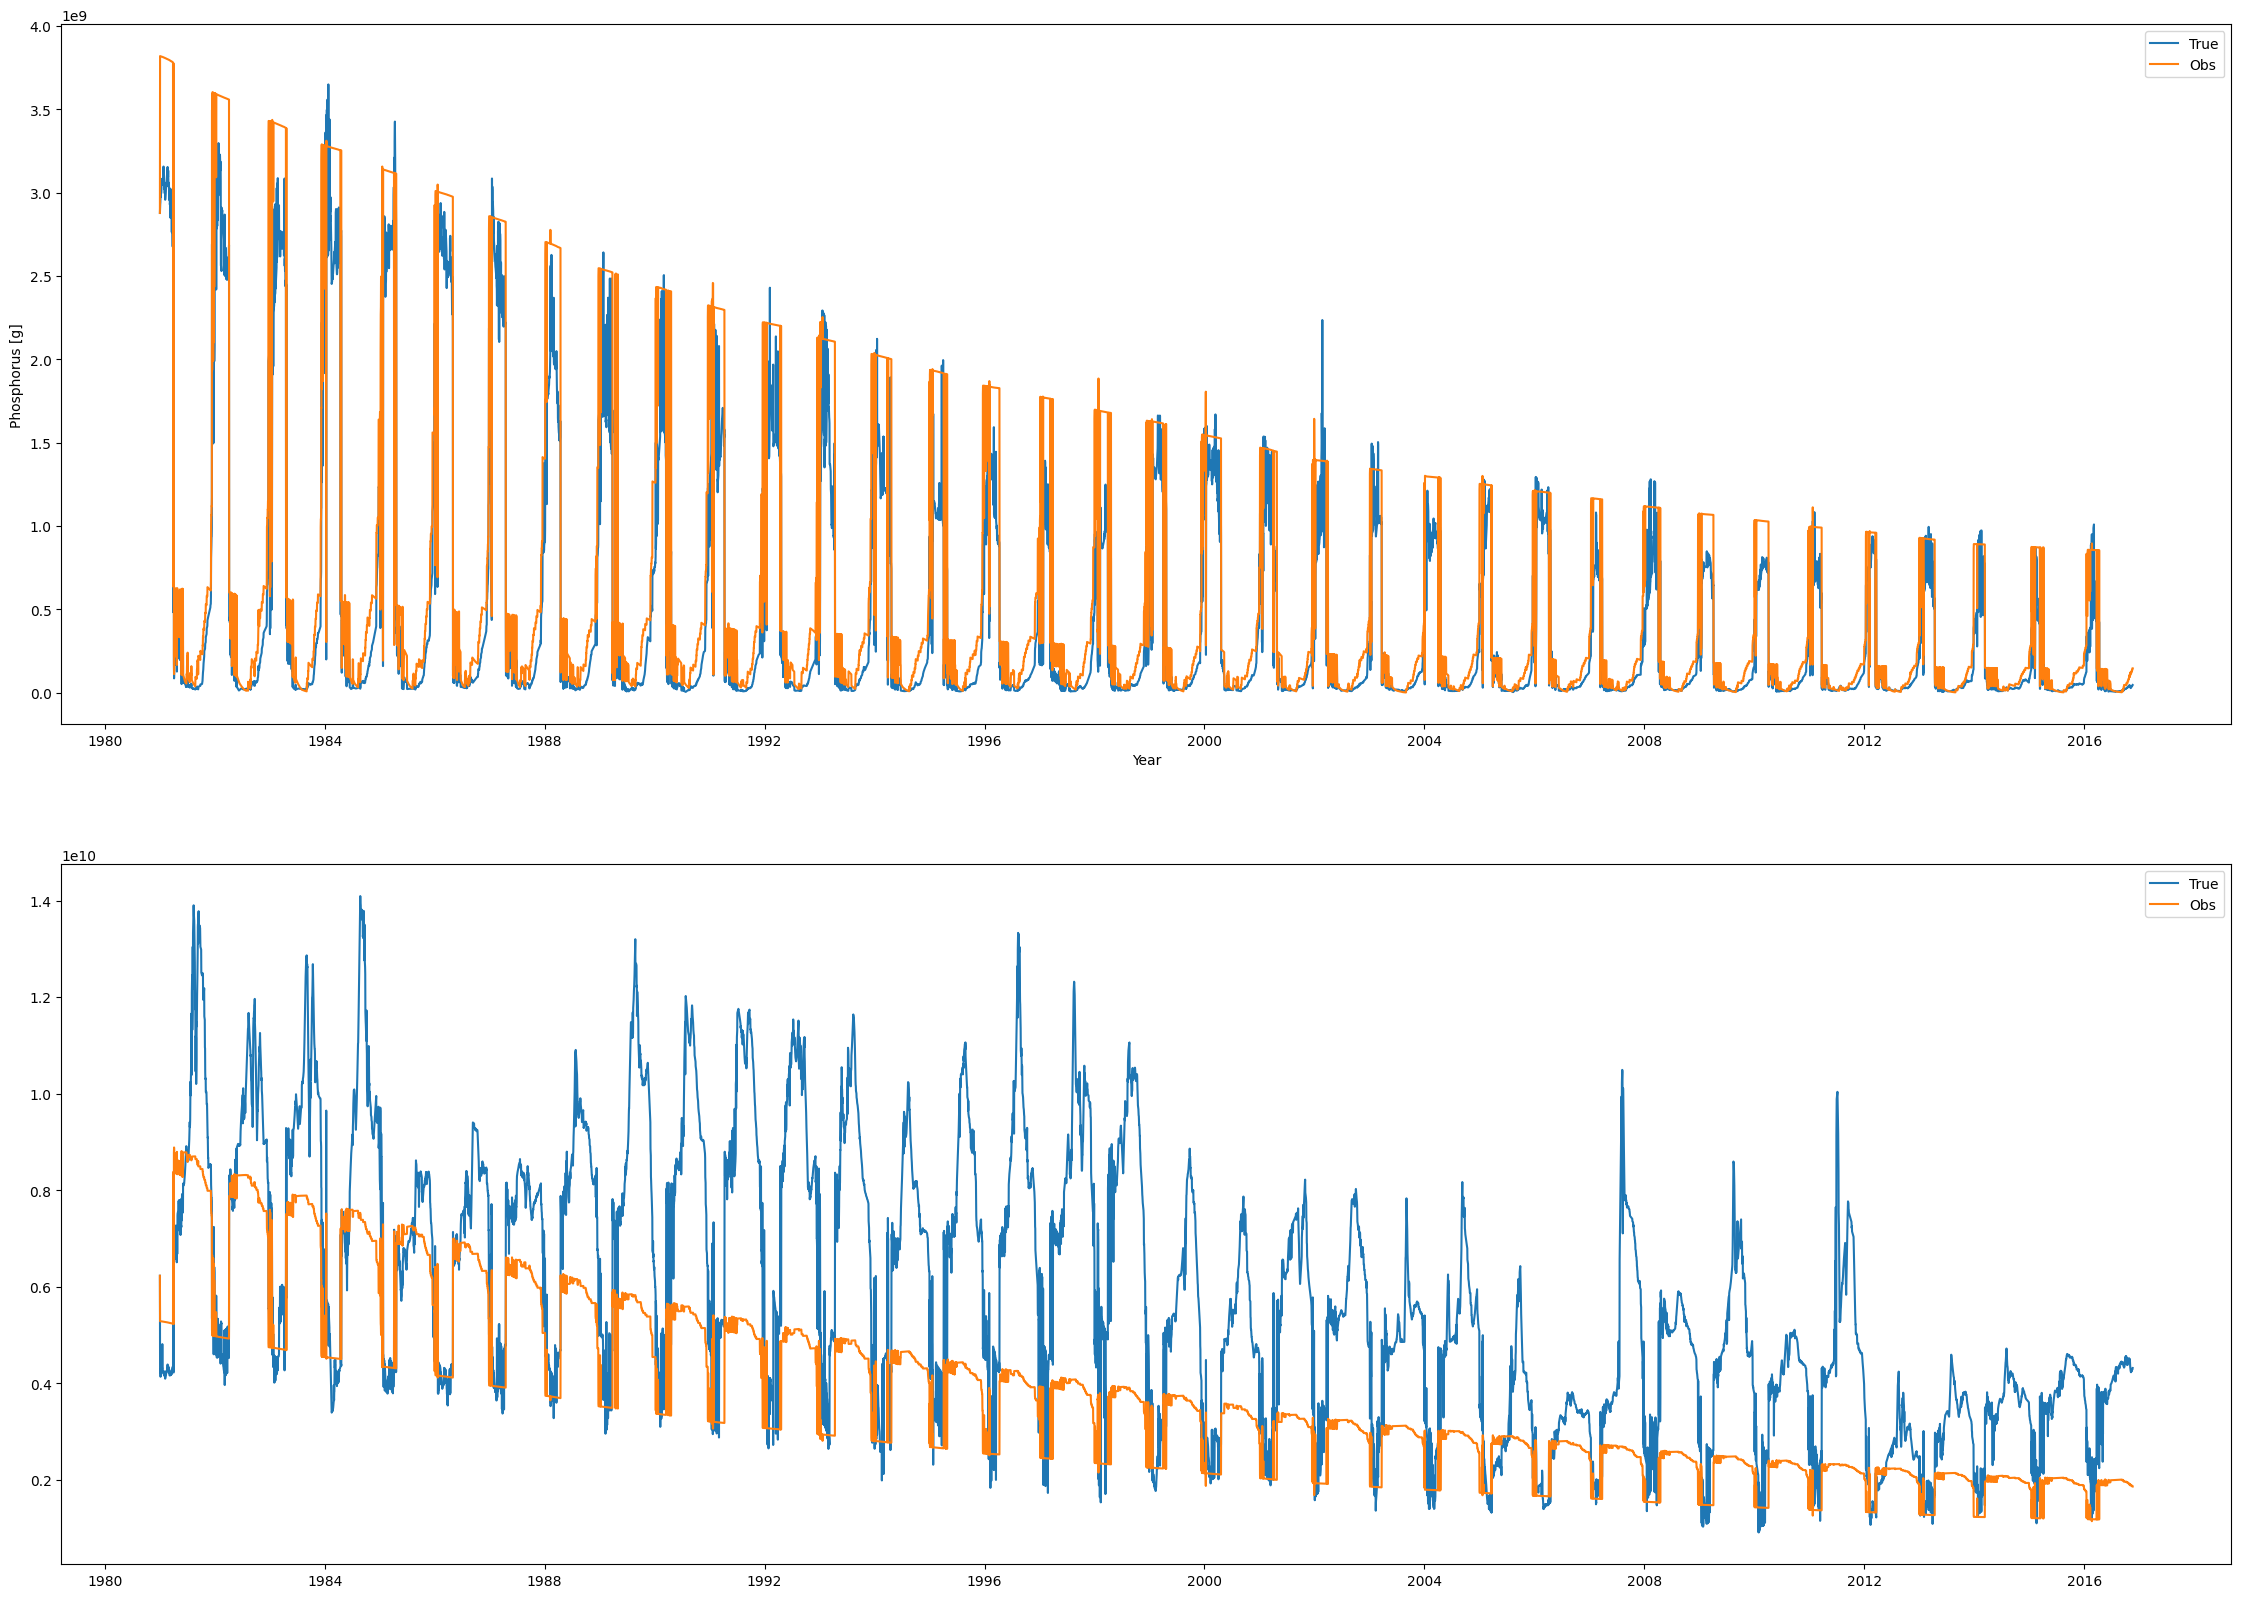

In [6]:
TOC = 0.11 # %
LakeArea = 582210000 # m2

# Sediment 
AvailableP = 0.65 # mg of P/g od fry weight
density = 1330000.0 #g/m^3 googled standard value for silt/clay
SedDepth = 0.1
SedimentArea  = LakeArea # [m2]
SedimentVolume = SedimentArea * SedDepth #m3 # 41.90e7
SedimentPConc = AvailableP * density * (1/1000) *SedDepth *10**6# ug/m2 of sedi

'''Parameters Initialization'''
Sedv = DF.SedV[10]
Ndays = range(0,len(DF.index),1)
V = ('EntrP,Rp,SedPepi,SedPh,Ep,IepiP,IsedP,Bp,SedPhyp,Hvd,Pepi,Phyp,Psed').split(',')

for v in V:
    exec(f'{v} = np.asarray([np.nan]*len(Ndays))') 


# Calculate epi and hypo volume vectors, which should always add up to lake volume
HypV = np.asarray(DF.HypV)# hypolimnetic volume time series
EpiV = np.asarray(DF.EpiV)

# Change in epilimnetic volume (m3), used for entrainment
# where a +change means transfer of volume from hypo to epi
dEpiV = np.insert(np.diff(EpiV),0,0)

Pepi[0] = DF[['EpiP']].values[0]#['EpiTP[g/m3]'][0]*DFF['EpiV'][0] 
Phyp[0] = DF[['HypP']].values[0]#['HypTP[g/m3]'][0]*DFF['HypV'][0]

# Used paramters

params0 =  {'ThetaSPepi': 1.3123834064195374,
            'ThetaSPhyp': 1.1241227447142852,
            'TbaseSPepi': 7.113509201569038,
            'TbaseSPhyp': 7.179827943922088,
            'TbaseRp': 7.902335061473191,
            'ThetaRp': 1.1264026422029476,
            'PSED': 1,
            'CburialP': 0.01,
            'KsedP': (32*100*10**3),#g
            'RrecP': 1e-2,
            'le_opt': 0.3 ,
            'alpha':  0.6,
            'beta': 0.3}

Output =1;Data = 1 ; O = 'df'
k=PLGM(params0,DF)

## Plot
epit = DF[['EpiP']][:-2].values.T[0]*1e-6#/DF.iloc[0:13106,:]['EpiV'].values
epip = k.iloc[:,0].values*1e-6#/DF.iloc[0:13106,:]['EpiV'].values
t     = pd.to_datetime(DF.loc[:,'Time'][:-2].values)#.T[0]
hypp = k.iloc[:,6]*1e-6#/DF.iloc[0:13106,:]['HypV']
hypt =DF[['HypP']][:-2].values.T[0]*1e-6#/DF.iloc[0:13106,:]['HypV']

sed = k.iloc[:,-2]*1e-6#/Sedv
PLGMplot(t,epip,epit,hypt,hypp)

#### Sensivity

In [67]:
TOC = 0.11 # %
LakeArea = 582210000 # m2

# Sediment 
AvailableP = 0.65 # mg of P/g od fry weight
density = 1330000.0 #g/m^3 googled standard value for silt/clay
SedDepth = 0.1
SedimentArea  = LakeArea # [m2]
SedimentVolume = SedimentArea * SedDepth #m3 # 41.90e7
SedimentPConc = AvailableP * density * (1/1000) *SedDepth *10**6# ug/m2 of sedi

'''Parameters Initialization'''
Sedv = DF.SedV[10]
Ndays = range(0,len(DF.index),1)
V = ('EntrP,Rp,SedPepi,SedPh,Ep,IepiP,IsedP,Bp,SedPhyp,Hvd,Pepi,Phyp,Psed').split(',')

for v in V:
    exec(f'{v} = np.asarray([np.nan]*len(Ndays))') 


# Calculate epi and hypo volume vectors, which should always add up to lake volume
HypV = np.asarray(DF.HypV)# hypolimnetic volume time series
EpiV = np.asarray(DF.EpiV)

# Change in epilimnetic volume (m3), used for entrainment
# where a +change means transfer of volume from hypo to epi
dEpiV = np.insert(np.diff(EpiV),0,0)

Pepi[0] = DF[['EpiP']].values[0]#['EpiTP[g/m3]'][0]*DFF['EpiV'][0] 
Phyp[0] = DF[['HypP']].values[0]#['HypTP[g/m3]'][0]*DFF['HypV'][0]

sen_n = ['kmzvi','PSEDvi','Cburialvi',
         'EntrPvi','Lvi','Oxvi','svi',
         'Tvi','Evi','Res']
sen_v = [[0, 1.5, 2,5,10],   # Vertical eddy diffusion constant
         [0, 1.5, 2,5,10],   # Initial Sediment P concentration
         [0, 1.5, 2,5,10],   # Burial rate
         
         [0, 1.5, 2,5,10],   # Etrainment
         [0, 1.5, 2,5,10],   # Pload
         [1],              # Oxygen
         [0, 1.5, 2,5,10],  # Sedimentation rate
                     
         [0, 1.5,.2,5,10],   # Temperature
         [1],              # Export
         [0, 1.5, 2,5,10]]   # Release

for ix, i in enumerate(sen_n):
    exec(f'{i} = {sen_v[ix]}')

def PLGM(params,DF):
    
    '''
    Output  : [0] Array [ELSE] DataFrame
    Data    : [0] Optimization [ELSE] fix values
    
    '''
    #DF = DF.copy()
    if Data == 0:
        ThetaRp = params['ThetaRp'];ThetaSPhyp = params['ThetaSPhyp'];ThetaSPepi  = params['ThetaSPepi']
        KsedP  = params['KsedP']; SedDepth = 0.1
        TbaseSPepi  = params['TbaseSPepi']; TbaseSPhyp  = params['TbaseSPhyp']; TbaseRp = params['TbaseRp']
        RrecP = params['RrecP'];  PSED = params['PSED'];
        CburialP =params['CburialP']
        le_opt = params['le_opt']; alpha = params['alpha'], beta = params['beta']

    else:        
        ThetaRp = params0['ThetaRp'];ThetaSPhyp = params0['ThetaSPhyp'];ThetaSPepi  = params0['ThetaSPepi']
        KsedP  = params0['KsedP']; SedDepth = 0.1;RrecP = params0['RrecP']
        CburialP =params0['CburialP'];  PSED = params0['PSED'];
        TbaseSPepi  = params0['TbaseSPepi']; TbaseSPhyp  = params0['TbaseSPhyp']; TbaseRp = params0['TbaseRp']
        
        le_opt = params0['le_opt']
        alpha = params0['alpha']
        beta = params0['beta']
    

        
    CoefRp       = np.asarray(ThetaRp**(DF.SedTemp*Tv - TbaseRp)) # Arrhenius coefficient for recycling
    CoefSPepi    = np.asarray(ThetaSPepi**(DF.EpiTemp*Tv - TbaseSPepi)) # Arrhenius coefficient for sedimentation (assuming phytos are sinking)
    CoefSPhyp    = np.asarray(ThetaSPhyp**(DF.HypTemp*Tv - TbaseSPhyp)) # Arrhenius coefficient for sedimentation (assuming phytos are sinking)
   
    Psed[0] = (SedimentArea * SedimentPConc)*PSED*PSEDv
    
    for i in Ndays[1:]:
        
        '''Entrainment'''

        if dEpiV[i] == 0:        
            EntrP[i] = 0 # Phosphorus entrainment
            #EntrN[i] = 0 # Nitrogen entrainmnet 

        elif dEpiV[i] >0:        
            EntrP[i] = EntrPv*(dEpiV[i]/HypV[i-1])*Phyp[i-1] # gP from Hyp
            #EntrN[i] = (dEpiV[i]/HypV[i-1])*Nhyp[i-1] # gN from Hyp
        
        else:
            EntrP[i] = EntrPv*(dEpiV[i]/EpiV[i-1])*Pepi[i-1] # gP from Pepi
            #EntrN[i] = (dEpiV[i]/EpiV[i-1])*Nepi[i-1] # gN from Pepi

        '''Recycling''' 
        Rp[i] = Re*Psed[i-1]*(RrecP)*(KsedP/(Oxv*DF['SedOx[g/m3]'][i-1]*DF.SedV[i-1] + KsedP))*CoefRp[i-1] #*((Psed[i-1]**q)/((Psed[i-1]**q)+(nP**q)))

        
        '''Vertical Diffusion (Hvd)'''
        Hvd[i] = 0
        if DF.Strat[i-1] == False:
            Csedi = 14.5/(89*10**13*155*365)
            CPsedEpi = Csedi /2
            CPsedHyp = Csedi /2


        else:
            kmz = DF.Kz[i-1]*kmzv#0.005*1.6*(151**0.568) # Diffusion coeficient
            Hvd[i] = kmz*(Phyp[i-1]-Pepi[i-1])/(DF.HypZm[i-1]-DF.EpiZm[i-1]) # Diffusion
            CPsedEpi = (14.5/(1000*EpiV[i-1]*DF.EpiZm[i-1]*365))
            CPsedHyp = (14.5/(1000*HypV[i-1]*DF.HypZm[i-1]*365)) 

       
        '''Sedimentation'''

        SedPepi[i] = sv*CPsedEpi*Pepi[i-1]*CoefSPepi[i-1]*Sedv
        SedPhyp[i] = sv*CPsedHyp*Phyp[i-1]*CoefSPhyp[i-1]*Sedv

        '''Loss'''
        # Nutrients
        Ep[i]    = Ev*DF.Qout[i-1]*(Pepi[i-1]/EpiV[i-1])     # River outflow
        
        '''Input'''
        #Phosphorus Load
        IepiP[i] = Lv*DF.LoadPe[i-1] # To epiliminion
        IsedP[i] = Lv*DF.LoadPh[i-1] # To hyp

        '''Burial'''
        Bp[i] = Cburialv*CburialP*(1/365)*(1/1000)*Psed[i-1]/SedDepth    # Sedimnets burial
        
        ''' Update '''
        if DF.Strat[i-1] == False and DF.Strat[i] == False: # Full mixed
            
            VpEpi      = DF.EpiV[i-1]/(DF.EpiV[i-1]+DF.HypV[i-1])
            
            EntrP[i]   = 0
            Hvd[i]     = 0
            
            Pepi[i] = (Pepi[i-1]+Phyp[i-1])*VpEpi       +  Rp[i]*VpEpi      + IepiP[i]    - SedPepi[i]  - Ep[i]     
            Phyp[i] = (Pepi[i-1]+Phyp[i-1])*(1-VpEpi)   +  Rp[i]*(1-VpEpi)  + IsedP[i]    - SedPhyp[i] 
            Psed[i] =  Psed[i-1] + SedPhyp[i]  + SedPepi[i]  -  Rp[i]  - Bp[i]

        else:
            Pepi[i] = Pepi[i-1] + IepiP[i]    + EntrP[i]  + Hvd[i] - SedPepi[i]  - Ep[i]  
            Phyp[i] = Phyp[i-1] + Rp[i]       + IsedP[i]  - Hvd[i] + SedPepi[i]  - EntrP[i]  - SedPhyp[i]
            Psed[i] = Psed[i-1] + SedPhyp[i]  - Rp[i]     - Bp[i]
    
    cond = not np.isnan(np.asarray(Pepi[:-2])).any()   
    #cond1 = not np.asarray([True if i is None else False for i in Pepi[:-2]]).any()
    time.sleep(1.5)
    clear_output(wait = True)
    if Output == 0 and cond:
        DF0 = DF.copy()
        loss =own_metric(DF0,Pepi = Pepi,Phyp = Phyp,l1 = 0.3)
        return(loss)
        #
    elif Output == 0 and not cond:
        loss = np.nan
        return(loss)
    else:
        if O =='df':
            DF0 = DF.copy()
            df = pd.DataFrame(data = {
                              'Time': DF.Time[:13106],
                               'Season':  DF.Season[:13106],
                              'EpiTP[g]':list(Pepi[:-2]),#/np.asarray(DF.EpiV[:13106])
                              'EntrTP[g]':list(EntrP[:-2]),
                              'IepiP': list(IepiP[:-2]),
                              'SedPepi[g]':list(SedPepi[:-2]),
                              'Ep[g]':list(Ep[:-2]),
                              'Hvd':list(Hvd[:-2]), 
                              'HypTP[g]':list(Phyp[:-2]),#/np.asarray(DF.HypV[:13106])
                              'SedPhyp[g]':list(SedPhyp[:-2]),
                              'Rp[g]':list(Rp[:-2]),
                              'IsedP[g]':list(IsedP[:-2]),
                              'Psed[g]':list(Psed[:-2]),
                              'Bp[g]':list(Bp[:-2])

                             })
            if cond:
                DF0 = DF.copy()
                loss = own_metric(DF0,Pepi = Pepi,Phyp = Phyp,l1 = 0.3)
            else:
                loss = np.nan
                
            return(df,loss)
        else:
            return(Pepi[:-2], Phyp[:-2])
        

    #return(df)

In [17]:
def own_metric(DF0,Pepi = None,Phyp = None,l1 = 0.3,t = 1, s= None):
    if t == 1:
        clear_output()
        l2 = 1 - l1
        l1e = l2*0.3 
        l2h = l2-l1e
        y_et = (DF0['EpiP'])[:-2]
        y_e = [(x - np.nanmin(y_et)) / (np.nanmax(y_et) - np.nanmin(y_et)) for x in y_et]

        y_et_pred = Pepi[:-2]
        y_e_pred = [(x - np.nanmin(y_et_pred)) / (np.nanmax(y_et_pred) - np.nanmin(y_et_pred)) for x in y_et_pred]

        y_ht = (DF0['HypP'])[:-2]
        y_h = [(x - np.nanmin(y_ht)) / (np.nanmax(y_ht) - np.nanmin(y_ht)) for x in y_ht]    

        y_ht_pred = Phyp[:-2]
        y_h_pred = [(x - np.nanmin(y_ht_pred)) / (np.nanmax(y_ht_pred) - np.nanmin(y_ht_pred)) for x in y_ht_pred]

        # Performance metric computation 
        y_e, y_e_pred,y_h,y_h_pred  = [list (x) for x in [y_e, y_e_pred,y_h,y_h_pred]]
        y_e, y_e_pred= [a for a, b in zip(y_e, y_e_pred) if not (np.isnan(a) or np.isnan(b))], [b for a, b in zip(y_e, y_e_pred) if not (np.isnan(a) or np.isnan(b))]
        y_h, y_h_pred= [a for a, b in zip(y_h, y_h_pred) if not (np.isnan(a) or np.isnan(b))], [b for a, b in zip(y_h, y_h_pred) if not (np.isnan(a) or np.isnan(b))]            

        r2_e    = r2_score(y_e,y_e_pred)
        rmse_e  = np.sqrt(mean_squared_error(y_e,y_e_pred))

        r2_h    = r2_score(y_h,y_h_pred)
        rmse_h  = np.sqrt(mean_squared_error(y_h,y_h_pred))

        loss = rmse_e*l1e + rmse_h*l2h + abs(1-r2_e)*(l1e) + abs(1-r2_h)*(l2h)
    else:
        l2 = 1 - l1
        l1e = l2*0.3 
        l2h = l2-l1e
        DF0.set_index('Time',inplace = True)
        # DF0['EpiTP[g]'] = DF0['EpiTP[g/m3]']*DF0.EpiV
        # DF0['HypTP[g]'] = DF0['HypTP[g/m3]']*DF0.HypV
        mask = DF0.Season == s
        te = DF0[mask].groupby([DF0[mask].index.year,DF0[mask].index.month])[['EpiP']]\
                         .agg(np.median).values
        th = DF0[mask].groupby([DF0[mask].index.year,DF0[mask].index.month])[['HypP']]\
                         .agg(np.median).values
        y_et = te[:-2]
        y_e = [(x - np.nanmin(y_et)) / (np.nanmax(y_et) - np.nanmin(y_et)) for x in y_et]

        y_et_pred = Pepi[:-2]
        y_e_pred = [(x - np.nanmin(y_et_pred)) / (np.nanmax(y_et_pred) - np.nanmin(y_et_pred)) for x in y_et_pred]

        y_ht = th[:-2]
        y_h = [(x - np.nanmin(y_ht)) / (np.nanmax(y_ht) - np.nanmin(y_ht)) for x in y_ht]    

        y_ht_pred = Phyp[:-2]
        y_h_pred = [(x - np.nanmin(y_ht_pred)) / (np.nanmax(y_ht_pred) - np.nanmin(y_ht_pred)) for x in y_ht_pred]
        # Performance metric computation 
        y_e, y_e_pred,y_h,y_h_pred  = [list (x) for x in [y_e, y_e_pred,y_h,y_h_pred]]
        y_e, y_e_pred= [a for a, b in zip(y_e, y_e_pred) if not (np.isnan(a) or np.isnan(b))], [b for a, b in zip(y_e, y_e_pred) if not (np.isnan(a) or np.isnan(b))]
        y_h, y_h_pred= [a for a, b in zip(y_h, y_h_pred) if not (np.isnan(a) or np.isnan(b))], [b for a, b in zip(y_h, y_h_pred) if not (np.isnan(a) or np.isnan(b))]            


        r2_e    = r2_score(y_e,y_e_pred)
        rmse_e  = np.sqrt(mean_squared_error(y_e,y_e_pred))

        r2_h    = r2_score(y_h,y_h_pred)
        rmse_h  = np.sqrt(mean_squared_error(y_h,y_h_pred))
        # DF.reset_index(inplace = True)
        loss = rmse_e*l1e + rmse_h*l2h + abs(1-r2_e)*(l1e) + abs(1-r2_h)*(l2h)
    return(loss)

In [68]:
# Used paramters  TOOO CHECK!!!
(((10**-6)*np.min(DF.EpiP))/
                      (DF[DF.EpiP ==np.min(DF.EpiP)]['EpiV']*0.001))/1
params0 =  {'ThetaSPepi': 1.3123834064195374,
            'ThetaSPhyp': 1.1241227447142852,
            'TbaseSPepi': 4.113509201569038,
            'TbaseSPhyp': 14.179827943922088,
            'TbaseRp': 7.902335061473191,
            'ThetaRp': 1.1264026422029476,
            'PSED': 1,
            'CburialP': 0.01,
            'KsedP': (32*100*10**3),#g/m3
            'RrecP': 1e-2,
            'le_opt': 0.3 ,
            'alpha':  0.6,
            'beta': 0.3}

Output = 1; Data = 1; O = 'df'
DF0 =DF.copy()
for i in sen_n:
    exec(f'{i[:-1]} = 1')
pred = PLGM(params0,DF0)[0].set_index('Time')
score = PLGM(params0,DF0)[1]

overall_baseline = score 
overall_importances = {}
f = lambda l,v: [x for x in l if x != v]

for ix,i in enumerate(sen_n):
    for vx,v in enumerate(sen_v[ix]): 
        clear_output(wait = True)
        exec(f'{i[:-1]} = {v}')
        score = 0
        for rx,r in enumerate(f(sen_n,i)):
            exec(f'{r[:-1]} = {1}')            
        DF0 = DF.copy()
        Output = 0; Data = 1
        score +=  PLGM(params0,DF0)
        print(i , score, overall_baseline)
        
        if i not in overall_importances:             
            overall_importances[i] = {vx:np.abs(overall_baseline - score)}
        else:
            overall_importances[i][vx] = np.abs(overall_baseline - score)
        

Res 0.4069194731274668 0.4081812221908733


In [70]:
fi = pd.DataFrame(overall_importances).apply(lambda x: np.nanmax(x)).to_dict()
v = np.array(list(fi.values()))/sum(np.array(list(fi.values())))
sorted_indices = np.argsort(v)[::-1]
names = list(fi.keys())
nm = {}
for i in range(len(sorted_indices)):
    nm[names[sorted_indices[i]]] = {'value':fi[names[sorted_indices[i]]]}
    # print(f"{i+1}. {names[sorted_indices[i]]},{fi[names[sorted_indices[i]]]}")
FI = pd.DataFrame(nm).T
FI['value'] = np.round(FI['value'] / np.sum(FI['value']),3)
FI

,value
EntrPvi,0.734
Lvi,0.250
kmzvi,0.009
Tvi,0.004
svi,0.003
PSEDvi,0.000
Res,0.000
Cburialvi,0.000
Evi,0.000
Oxvi,0.000
